# Analyse

In [76]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [156]:
#data = pd.read_csv("results/f1-r@k_02-12-24:14:40:02.csv", index_col=0)
#data = pd.read_csv("results/f1-r@k_29-11-24:18:52:08.csv", index_col=0)
data = pd.read_csv("results/times-03-12-24:07:33:00.csv", index_col=0)
#data['Initial Sample'] = data['Initial Sample'].astype(str)
data['index'] = data['count'].astype(str)


In [153]:
data.head()

,Runs,Index,count,Time,index
0,0,False,1,0.118634,1
1,0,False,2,0.132708,2
2,0,False,3,0.220992,3
3,0,False,4,0.248320,4
4,0,False,5,0.272266,5


In [90]:
pivot = pd.pivot_table(data, values="F1 on Queries", index='Initial Sample', columns=['Query Sample'], aggfunc="mean")
#pivot = pd.pivot_table(data, values="F1 on Queries", index='Initial Sample', columns=['Query Sample'], aggfunc="mean")
pivot

Query Sample,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Initial Sample,,,,,,,,,,
0.1,0.997765,0.996648,0.997753,1.000000,0.995518,0.997765,0.997753,0.997765,0.997765,1.000000
0.2,0.996648,0.997753,0.997765,0.996648,0.997765,0.997765,0.998883,1.000000,0.998883,0.998883
0.3,1.000000,0.998883,1.000000,0.998883,0.998883,1.000000,1.000000,0.998883,0.998883,1.000000
0.4,1.000000,0.998883,1.000000,1.000000,1.000000,1.000000,0.998883,1.000000,1.000000,1.000000
0.5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Query Sample', ylabel='Initial Sample'>

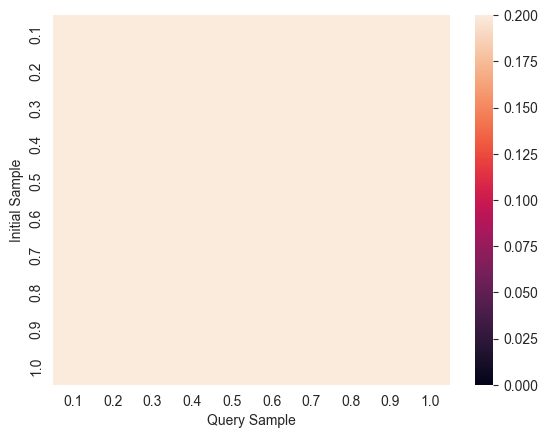

In [91]:
sns.heatmap(pivot, vmin=0, vmax=0.2)

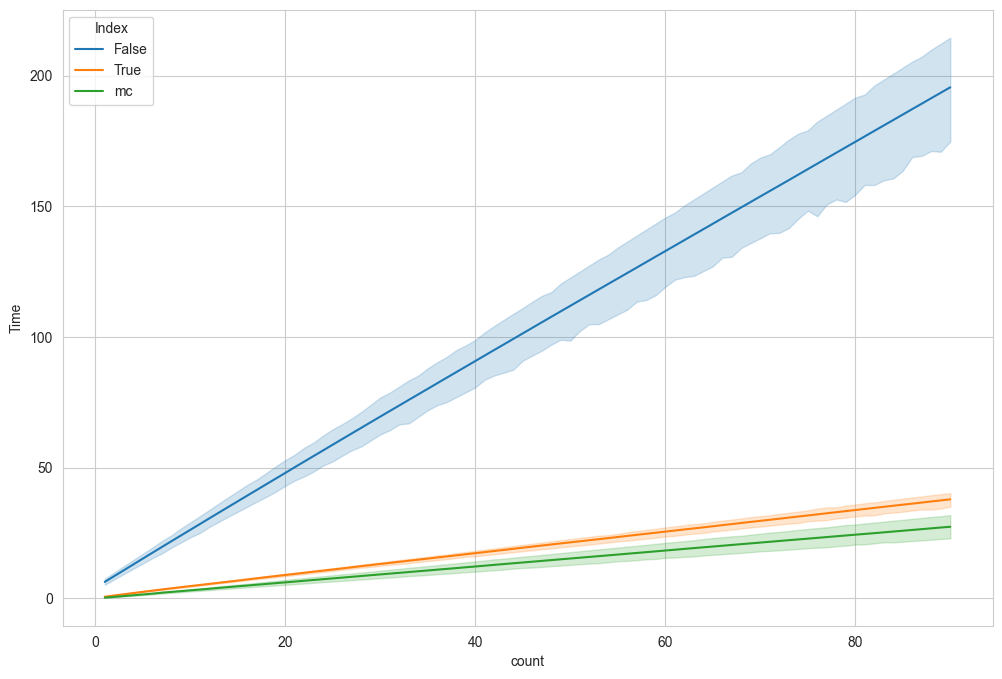

In [157]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
x="count"
y="Time"
hue="Index"
plot=sns.lineplot(ax=ax,data=data,x=x,y=y,hue=hue,)
#plot=sns.boxplot(ax=ax,data=data, x=x, y=y, hue=hue,)

In [158]:
save=plot.get_figure()
name="figures/test_"+y+"_"+x+"_"+hue+".png"
save.savefig(name)